<a href="https://colab.research.google.com/github/kapeeshvarma/Company-Bankruptcy-Prediction/blob/main/Company_Bankruptcy_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**COMPANY BANKRUPTCY PREDICTION**

Prediction of Bankruptcy is a phenomenon of increasing interest to firms who stand to loose money because on unpaid debts. Since computers can store huge datasets pertaining to bankruptcy, making accurate predictions from them before hand is becoming important.

The data used in this project has been collected from the Taiwan Economic Journal for the years 1999 to 2009. Company Bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

In this project we will use various classification algorithms on bankruptcy dataset to predict bankruptcies with satisfying accuracies long before the actual event.

##Importing Packages and Data

In [128]:
# Import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [105]:
# Read in the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Company Bankruptcy Prediction - Kapeesh Varma/COMPANY BANKRUPTCY PREDICTION.csv')

In [106]:
# Print the shape and head of the DataFrame
print(data.shape)
data.head(5)

(6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

## Data Analysis and Visualizations

In [140]:
# Explore the Descriptive Statistics of the data
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

0    6599
1     220
Name: Bankrupt?, dtype: int64


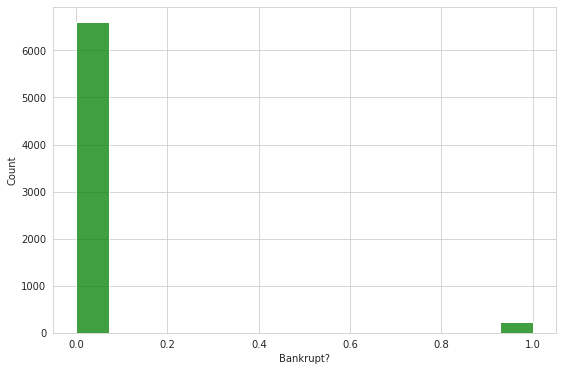

In [196]:
# Visualize how many records indicate Bankruptcy
print(data['Bankrupt?'].value_counts())

sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(9,6)

sns.histplot(data['Bankrupt?'],color='green')
plt.show()

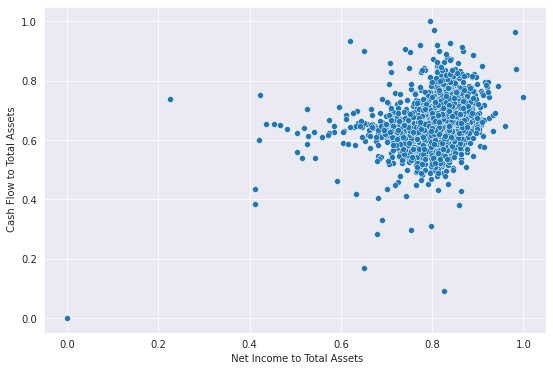

In [197]:
# Explore relation b/w Net Income to Total Assets and Cash Flow to Total Assets
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(9,6)

sns.scatterplot(x=' Net Income to Total Assets', y=' Cash Flow to Total Assets',	data=data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


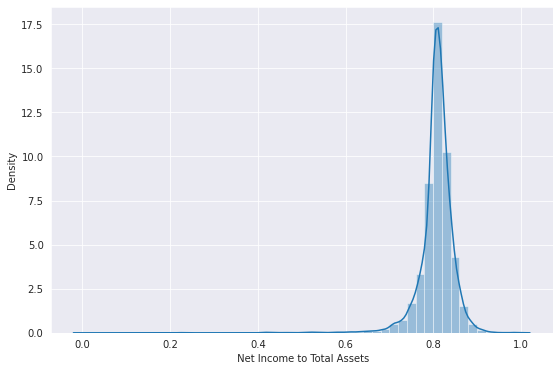

In [232]:
# Visualize the distribution of Net Income to Total Assets
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(9,6)

ax = sns.distplot(data[' Net Income to Total Assets'])
plt.show()

## Dimensionality Reduction

The Data consists of 6819 records with 96 columns! This huge number of columns make it really difficult for modelling and predictions. So, we reduce the dimensions of the data using Principal Component Analysis.

In [107]:
# Initialize PCA with required number of components and fit_transform the data
pca = PCA(n_components=25)
reduced_data = pca.fit_transform(data.drop('Bankrupt?',axis=1))
reduced_data.shape

(6819, 25)

In [108]:
# Create a new DataFrame with the reduced data
new_data = pd.concat([data['Bankrupt?'],pd.DataFrame(reduced_data)],axis=1)

In [109]:
new_data.head(5)

,Bankrupt?,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1,2.165330e+09,-3.814949e+07,-3.237615e+09,-2.063212e+09,-1.969494e+09,-1.410239e+09,-8.723455e+08,-3.342048e+09,-6.724872e+07,-6.176979e+07,-1.008738e+08,-4.089025e+07,-3.052468e+07,-1.450157e+07,-1.261796e+07,-1.608745e+07,-1.082433e+07,-9.594431e+06,-3.684855e+06,-3.477068e+06,-1.427628e+07,-7.717010e+05,-1.784430e+06,-863266.256808,0.439582
1,1,4.902366e+08,8.463795e+09,8.746100e+08,-3.292132e+09,-1.383796e+09,-1.194097e+09,-2.313543e+08,-2.330575e+09,3.305436e+07,-7.742768e+07,-6.047728e+07,-3.839345e+07,-9.459092e+06,2.809247e+06,-1.610367e+07,-1.966260e+06,-4.013065e+06,3.392343e+05,-3.207236e+06,-1.615297e+06,-1.379980e+07,7.903678e+05,-8.018587e+03,117114.426014,0.723937
2,1,-2.620138e+09,-2.169966e+09,-1.239416e+09,8.771527e+08,-2.812465e+09,-1.582306e+09,1.654892e+09,-4.584627e+08,-2.737372e+08,-8.123744e+07,5.236231e+09,-2.755552e+07,-2.891193e+07,-1.479720e+08,-1.282115e+08,-4.957818e+08,-4.983363e+06,-7.351532e+06,2.688157e+06,-2.636936e+06,-8.994466e+05,-5.664120e+07,5.083825e+06,-900147.997862,0.249851
3,1,3.249284e+09,5.987899e+09,-2.180465e+09,-4.385660e+09,-2.566962e+09,1.061380e+09,7.876119e+09,4.758288e+09,-5.484820e+07,2.406780e+07,-5.570970e+07,-1.881365e+07,-2.743767e+06,4.146900e+06,-2.497417e+07,1.379922e+07,1.078678e+06,-8.624433e+06,1.927873e+06,-1.874867e+07,-1.234257e+06,3.214677e+06,1.744171e+06,541452.036057,-0.113370
4,1,7.604602e+09,-2.951427e+09,2.267775e+09,-2.370486e+09,-1.647314e+09,-3.956955e+08,-4.681061e+08,2.215795e+09,-7.627852e+07,-4.244472e+07,-8.451889e+07,-6.779376e+06,-1.795122e+07,4.451653e+06,-1.761454e+07,-7.522076e+06,-2.229420e+06,-7.863227e+05,5.570674e+05,-2.746428e+06,-1.548594e+07,8.544160e+05,-6.655064e+05,-282772.691969,-0.045536


In [138]:
x = new_data.drop('Bankrupt?',axis=1).values
y = new_data['Bankrupt?'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

svc = SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred, average='weighted'))

0.9743401759530792
0.9631242288849227


In [136]:
x = data.drop('Bankrupt?',axis=1).values
y = data['Bankrupt?'].values

s = StandardScaler()
s.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [124]:
rfe = RFE(estimator=LogisticRegression(max_iter=500), n_features_to_select=25,step = 10)
rfe.fit(x_train,y_train)

mask = rfe.support_
pred = rfe.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test, pred))

0.9589442815249267
[[1308   13]
 [  43    0]]


In [125]:
x = new_data.drop('Bankrupt?',axis=1).values
y = new_data['Bankrupt?'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.967741935483871
[[1317    2]
 [  42    3]]
